In [1]:
from DFTDataFrame.Tools import (
    get_project_root,
    create_frame,
    get_Moments_Frame,
    Atommultiindex
)



/Users/dk2994/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings
warnings.simplefilter('ignore')

In [4]:
# Creating a dataframe from a given directory and its subdirectories.
# The Flag file is the file inidicating in which folders it should look for. 
# Calc_file is read by ase.read to an Atoms object and reading all information from.

root=get_project_root()
NiO = create_frame(root+'/../tests/test_data/NiO/', calc_file='OUTCAR', flag_file='OUTCAR', droplist=['clean']) #Droplist contains strings which can be ommited when creating the Name/Index


Found 2 folders in /Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/NiO/


In [5]:
NiO['magnetic_moment'] = NiO.apply(lambda x: round(x.struc.get_magnetic_moment(),2), axis=1)
NiO['magnetic_moment']

F     54.57
AF     0.00
Name: magnetic_moment, dtype: float64

In [6]:
#To deal with atom specific information with create a Multiindex DataFrame which has two indici:
#The Name and the atomic indici
NiOAtoms = Atommultiindex(NiO, 'NiOAtoms')
NiOAtoms

Symbols
F  0       Ni
   1       Ni
   2       Ni
   3       Ni
   4       Ni
...       ...
AF 59       O
   60       O
   61       O
   62       O
   63       O

[128 rows x 1 columns]

In [7]:
#We add another column with the magnetic moments read from the 'struc' column

NiOAtoms['Moments'] = get_Moments_Frame(NiO, index='Name')
NiOAtoms

Symbols  Moments
F  0       Ni    1.473
   1       Ni    1.490
   2       Ni    1.476
   3       Ni    1.472
   4       Ni    1.473
...       ...      ...
AF 59       O    0.000
   60       O   -0.000
   61       O    0.000
   62       O    0.000
   63       O   -0.000

[128 rows x 2 columns]

In [22]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

def D3plot(x,y,z,values,title, roll=0, elev=0, azim=120, s=400, edgecolor='black', font=11, labels=True):
    # setup the normalization and the colormap
    normalize = mcolors.Normalize(vmin=-2, vmax=2)
    colormap = cm.rainbow
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d',title=title, proj_type = 'ortho')
    ax.scatter(x,y,z, c=colormap(list(map(normalize, values))), s = s, linewidth=1.9, alpha=1, edgecolor=edgecolor)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_xlim3d(min(x), max(x))
    ax.set_ylim3d(min(y), max(y))
    ax.set_zlim3d(min(z), max(z))
    ax.view_init(elev=elev, azim=azim)
    if labels:
        for i in np.arange(0, len(values)):
            i = int(i)
            if np.abs(values[i])>0.2:
                ax.text(x[i],y[i], z[i], round(values[i],1), ha="center" ,va='center', fontsize=font)
 
    # setup the colorbar
    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(values)
    plt.colorbar(scalarmappaple, ax=ax)
    ax.axis('off')
    ax.set_aspect('equal')
    plt.show()



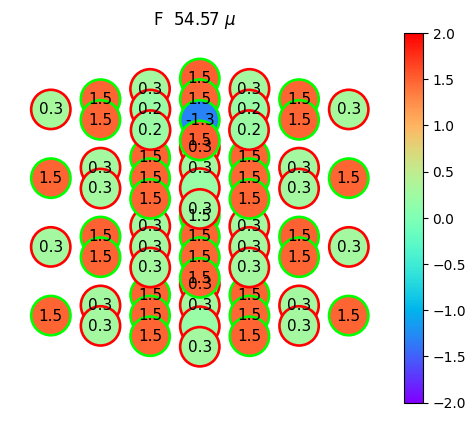

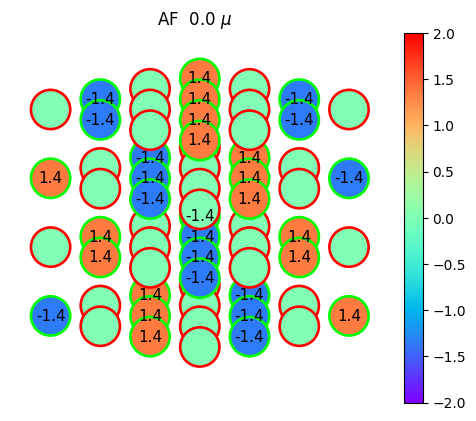

In [24]:
coldic = {'Ni':'lime', 'O':'red'}
raddic = {'Ni':800, 'O':800}


for i in NiO.index:
    a = NiO.loc[i].struc
    row = NiO.loc[i]
    #a = a.repeat([2,2,1])
    c = NiOAtoms.loc[i]
    z = a.get_positions()[:, 2]
    y = a.get_positions()[:, 1]
    x = a.get_positions()[:, 0]
    s = a.get_chemical_symbols()
    radii= [raddic[i] for i in s]
    edgecolor= [coldic[i] for i in s]
    magnets = c.Moments.to_list()
    title = row.Name + '  ' + str(row['magnetic_moment']) + ' $\mu$'
    #magnets = magnets*4
    D3plot (x, y, z, magnets,title, s=radii, roll=0, elev=12, azim=-45,edgecolor=edgecolor, labels=True)

